# FINAL PROJECT

### DATA SET - Anime and Rating

DATA SOURCE:https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database?datasetId=571&searchQuery=ed


This data set contains information on user preference data from 73,516 users on 12,294 anime. Each user is able to add anime to their completed list and give it a rating and this data set is a compilation of those ratings.

Anime.csv

anime_id - myanimelist.net's unique id identifying an anime.<br>
name - full name of anime.<br>
genre - comma separated list of genres for this anime.<br>
type - movie, TV, OVA, etc.<br>
episodes - how many episodes in this show. (1 if movie).<br>
rating - average rating out of 10 for this anime.<br>
members - number of community members that are in this anime's
"group".

Rating.csv

user_id - non identifiable randomly generated user id.<br>
anime_id - the anime that this user has rated.<br>
rating - rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating).<br>

DATA SIZE: 100.34 MB


In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
# READING THE DATA SETS 
anime=pd.read_csv(r"C:\Users\Admin\Downloads\anime.csv")
rating=pd.read_csv(r"C:\Users\Admin\Downloads\rating.csv\rating.csv")

In [209]:
anime.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [210]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [211]:
anime.shape

(12294, 7)

In [212]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [213]:
rating.shape

(7813737, 3)

In [214]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


## DATA CLEANING

In [215]:
anime.isnull().sum() #checking for null values

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

>Renaming the rating column

In [216]:
anime.rename({'rating':'average_rating'}, axis=1, inplace=True)
anime['type'] = anime['type'].replace({'OVA':'Original Video Animation','ONA':'Original Net Animation'})


>Changed the datatype of episodes column in anime dataset

In [217]:
anime['episodes']=anime['episodes'].replace('Unknown',np.nan)
anime['episodes']=anime['episodes'].astype(float)

In [218]:
anime.head(2)

,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665


>Checked Number of missing ratings in anime dataset, that have an anime_id in rating 

In [219]:
common_id=anime[anime['anime_id'].isin(rating['anime_id'])]
common_id['average_rating'].isnull().sum()  

3

> Filling the missing rows in rating column in anime dataset which has anime_id in ratings dataset with median value

In [220]:
for i,j in zip(common_id[common_id['average_rating'].isnull()].index,common_id[common_id['average_rating'].isnull()]['anime_id'].values):
    median_value=rating[rating['anime_id']==j]['rating'].median()
    anime.loc[i,'average_rating']=median_value
 

In [221]:
print(anime['average_rating'].isnull().sum())
rating['rating'].isnull().sum()

227


0

> Dropping the the missing rows that we can not replace it by rating

In [177]:
anime.dropna(subset=['average_rating'],axis=0,inplace=True)

> Replacing null values in genre column with mostfrequent listed genre

In [178]:
anime['genre'].fillna(anime['genre'].mode().iloc[0], inplace=True)

> Dropping duplicate values in anime dataset

In [179]:
anime = anime.drop_duplicates('name')

In [180]:
anime.head()

,anime_id,name,genre,type,episodes,average_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266


In [181]:
rating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [182]:
anime_rating = pd.merge(rating, anime, on='anime_id', how='left')

In [183]:
anime_rating.shape

(7813737, 9)

## SANITY CHECK

<AxesSubplot:>

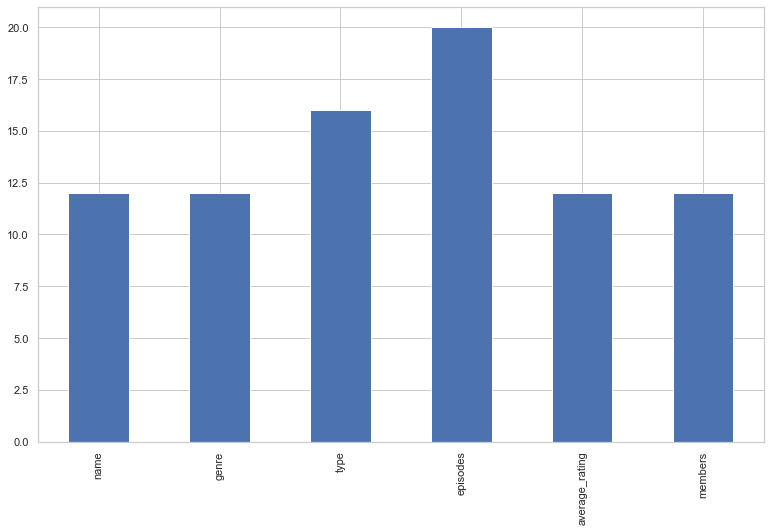

In [184]:
anime_rating.isna().sum()[anime_rating.isna().sum()>0].plot(kind='bar')

In [185]:
anime_rating.dropna(subset=['name'], how='all', inplace=True)

<AxesSubplot:>

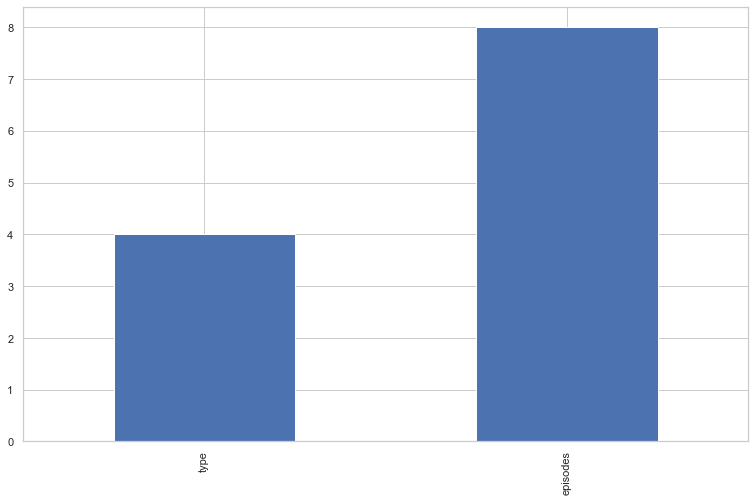

In [186]:
anime_rating.isna().sum()[anime_rating.isna().sum()>0].plot(kind='bar')

In [187]:
anime_rating['type'].fillna(anime_rating['type'].mode().iloc[0], inplace=True)
anime_rating['episodes'].fillna(anime_rating['episodes'].mode().iloc[0], inplace=True)

In [188]:
anime_rating.isna().sum()

user_id           0
anime_id          0
rating            0
name              0
genre             0
type              0
episodes          0
average_rating    0
members           0
dtype: int64

In [223]:
'''import plotly
import plotly.express as px
fig = px.box(anime_rating,
       x = 'type',
       y = 'average_rating',
      )

fig.update_xaxes(title='Type')
fig.update_yaxes(title='Average Rating')
fig.show()'''

"import plotly\nimport plotly.express as px\nfig = px.box(anime_rating,\n       x = 'type',\n       y = 'average_rating',\n      )\n\nfig.update_xaxes(title='Type')\nfig.update_yaxes(title='Average Rating')\nfig.show()"

## DATA VISULIZATION

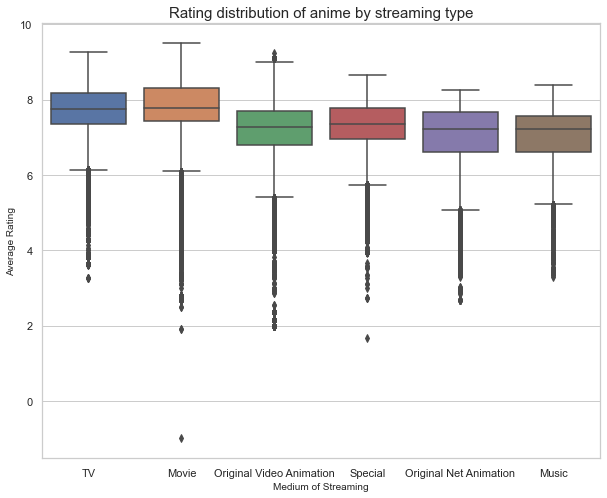

In [193]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set(style = 'whitegrid')
ax = sns.boxplot(x = 'type', y = 'average_rating', data = anime_rating)
ax.set_title('Rating distribution of anime by streaming type',fontsize = 15)
ax.set_xlabel('Medium of Streaming',fontsize = 10) 
ax.set_ylabel('Average Rating', fontsize = 10)
plt.show()

INSIGHTS:
  >  According to the user ratings it seems, top rated animes are presented in both TV shows and Movies

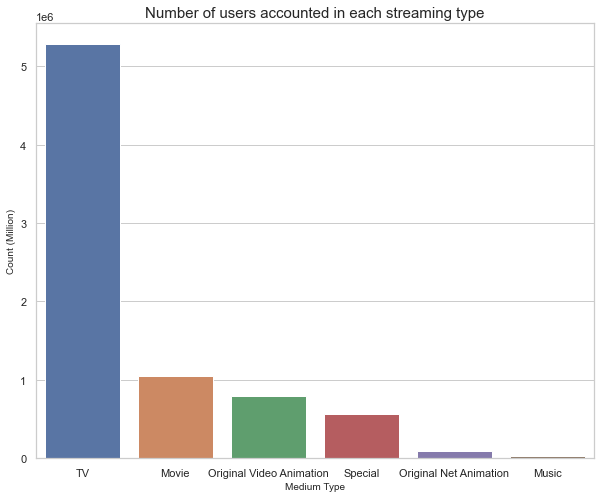

In [194]:
ax = sns.countplot(x = 'type', data = anime_rating)
ax.set_title('Number of users accounted in each streaming type',fontsize = 15)
ax.set_xlabel('Medium Type',fontsize = 10) 
ax.set_ylabel('Count (Million)', fontsize = 10)
plt.show()

INSIGHTS:
  >  It appears for anime viewers the most preferred streaming choice is Telivision followed by movie, Original video animation and others.
  

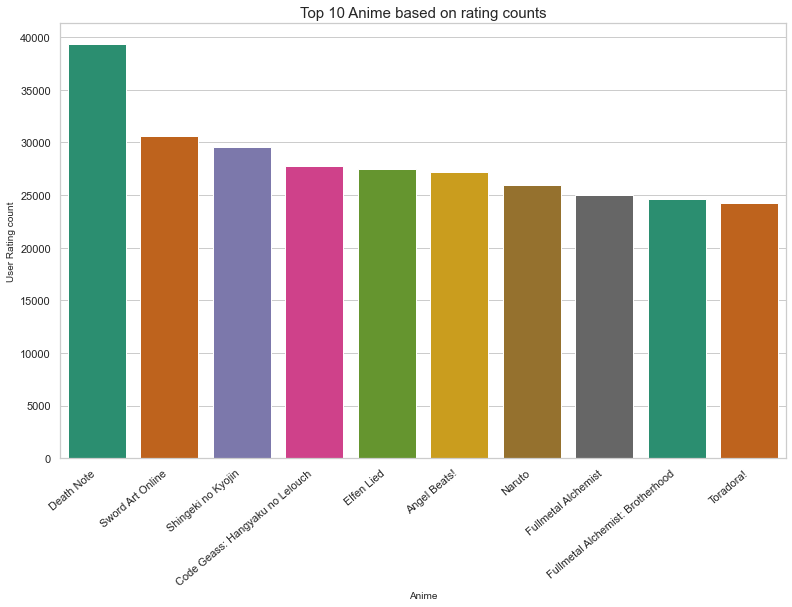

In [191]:
# Creating a dataframe for rating counts
combine_anime_rating = anime_rating.dropna(axis = 0, subset = ['name'])
anime_ratingCount = (combine_anime_rating.
     groupby(by = ['name'])['rating'].
     count().
     reset_index().rename(columns = {'average_rating': 'totalRatingCount'})
    [['name', 'rating']]
    )


top10_animerating=anime_ratingCount[['name', 'rating']].sort_values(by = 'rating',ascending = False).head(10)
ax=sns.barplot(x="name", y="rating", data=top10_animerating, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 15)
ax.set_xlabel('Anime',fontsize = 10) 
ax.set_ylabel('User Rating count', fontsize = 10)
plt.show()

INSIGHTS:
  > Death Note wears the crown for rating count followed by Sword Art Online and Shingeki No Kyojin

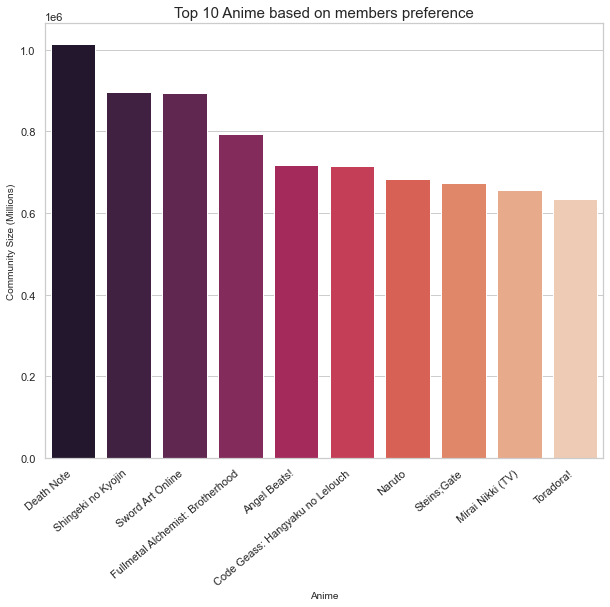

In [222]:
duplicate_anime=anime_rating.copy()
duplicate_anime.drop_duplicates(subset ="name", keep = 'first', inplace = True)
top10_anime_members=duplicate_anime[['name', 'members']].sort_values(by = 'members',ascending = False).head(10)
ax=sns.barplot(x="name", y="members", data=top10_anime_members, palette="rocket")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on members preference',fontsize = 15)
ax.set_xlabel('Anime',fontsize = 10) 
ax.set_ylabel('Community Size (Millions)', fontsize = 10)
plt.show()

INSIGHTS:
  >Death note again tops based on member presence

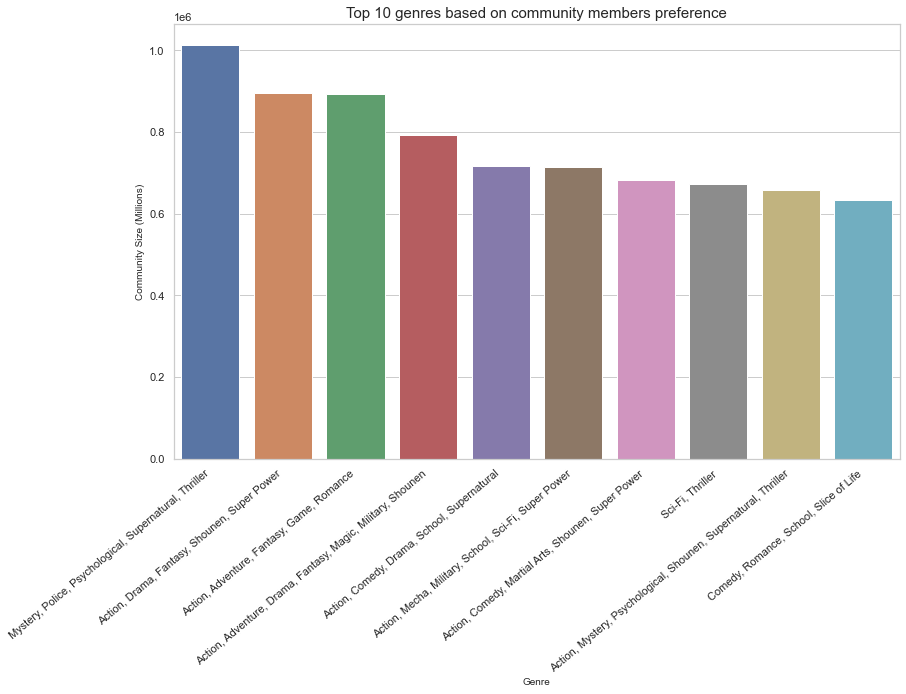

In [89]:
duplicate_anime=anime_rating.copy()
duplicate_anime.drop_duplicates(subset ="genre", keep = 'first', inplace = True)
top10_anime_members=duplicate_anime[['genre', 'members']].sort_values(by = 'members',ascending = False).head(10)
ax=sns.barplot(x="genre", y="members", data=top10_anime_members, palette="deep")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title("Top 10 genres based on community members preference",fontsize = 15)
ax.set_xlabel('Genre',fontsize = 10) 
ax.set_ylabel('Community Size (Millions)', fontsize = 10)
plt.show()

INSIGHTS:
  > Mystery,police,psychological,supernatural and thriller is the most watched genre based on community members preference

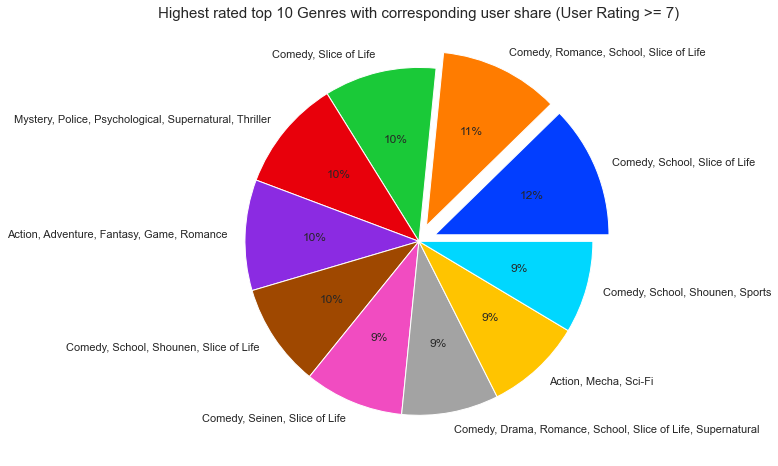

In [206]:
anime_rating_filter = anime_rating[anime_rating['rating'] >= 7]
a = anime_rating_filter.groupby('genre').size().reset_index(name='Count').sort_values(by = 'Count', ascending = False).head(10)
explode = [0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0]
palette_color = seaborn.color_palette('bright')
plt.pie(a['Count'], labels=a['genre'], colors=palette_color, explode=explode, autopct='%.0f%%')
plt.title('Highest rated top 10 Genres with corresponding user share (User Rating >= 7)', loc='center', fontsize=15)
plt.show()

INSIGHTS
  > Comedy, school, slice of life is the top genre with corresponding user share (User Rating >= 7)

## CONCLUSION

- Most of the users media of streaming is telivision.
- Death Note ranks 1 according to rating 
- also Death note is the one most people watched.
- Most people watch mystery,police,psychological,supernatural and thriller but comedy,school,slice of life has highest rating.